In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Описание полей датасета:
* survived - Пасажир выжил (1 = Да; 0 = Нет)
* pclass - Класс каюты пассажира (1 = Первый; 2 = Второй; 3 = Третий)
* sex - Пол
* age - Возраст
* sibsp - Количество Братьев (Сестер) / Супругов на борту
* parch - Количество Родителей / Детей на борту
* fare - Пассажирский тариф
* embarked - Порт посадки (C = Cherbourg; Q = Queenstown; S = Southampton)
* class - Класс пассажира в текстовом виде ( First, Second, Third)
* who - woman_child_or_man
* adult_male - Пассажир взрослый мужчина (True = Да; False = Нет)
* deck - Палуба
* embark_town - Порт посадки в текстовом виде (Cherbourg; Queenstown; Southampton)
* alive - Пасажир выжил (Yes = Да; No = Нет)
* alone - Пассажир путешествовал один (True = Да; False = Нет)

## Визуализация

#### Посмотрим, как были распределны люди по полу на титанике в зависимости от класса каюты

<AxesSubplot:xlabel='pclass', ylabel='count'>

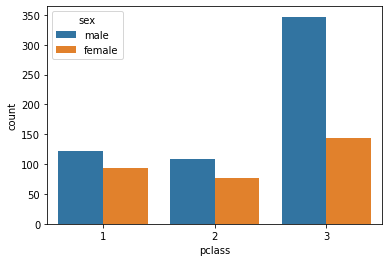

In [21]:
sns.countplot(x='pclass', hue='sex', data=titanic)

Заметно большое число мужчин в третьем классе. В других классах количество мужчин также превышает количество женщин.

#### Посмотрим на распеределение возрастов в каждом классе для разных полов

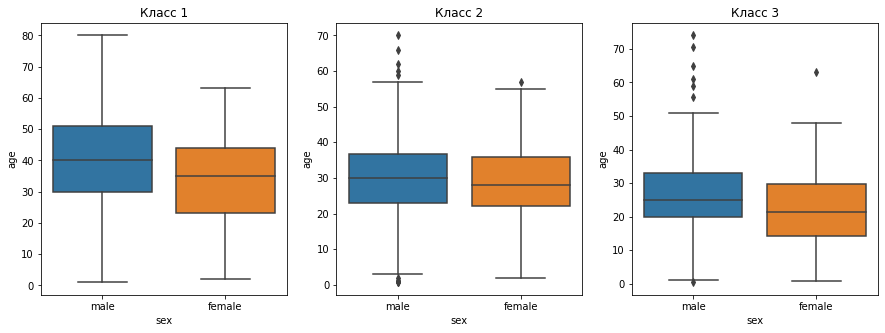

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for class_number in range(1, 4):
    sns.boxplot(x='sex', y='age', data=titanic[titanic.pclass==class_number], ax=axes[class_number-1], order=['male', 'female'])
    axes[class_number-1].set_title(f"Класс {class_number}")

Можно заметить, что чем престижней класс, тем выше средний возраст у типичного представителя. Данная тенденция распространяется на оба пола.

И в том и в другом классе есть как молодые люди, так и пожилые люди.

Обычно средний возраст женщины меньше среднего возраста мужчины в классе.

#### Посмотрим, как были распределены люди по классам в зависимости от потра посадки

<AxesSubplot:xlabel='embarked', ylabel='count'>

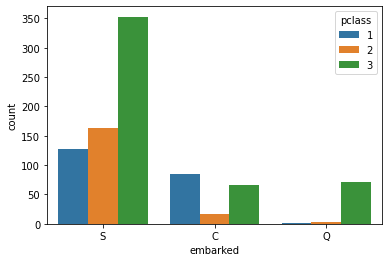

In [36]:
sns.countplot(x='embarked', data=titanic, hue='pclass')

C = Cherbourg; Q = Queenstown; S = Southampton

Большая часть людей села в Southampton. Причем в порту Cherbourg из числа зашедших людей выше половины были из 1 класса.

#### Посмотрим, влияет ли на выживаемость путешествие в одиночку

<AxesSubplot:xlabel='alone', ylabel='count'>

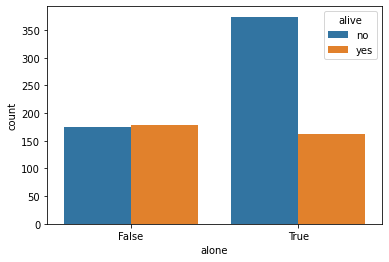

In [52]:
sns.countplot(x='alone', data=titanic, hue='alive')

Напрашивается вывод, что если человек путешествовал один, то он вероятнее погибал. А если он путешествовал с кем-то, то это могло как помочь, так и послужить медвежьей услугой.

Подробнее рассмотрим эту зависимость, применив деление на мужчину/женщину/ребенка

Text(0.5, 1.0, 'Невыжившие')

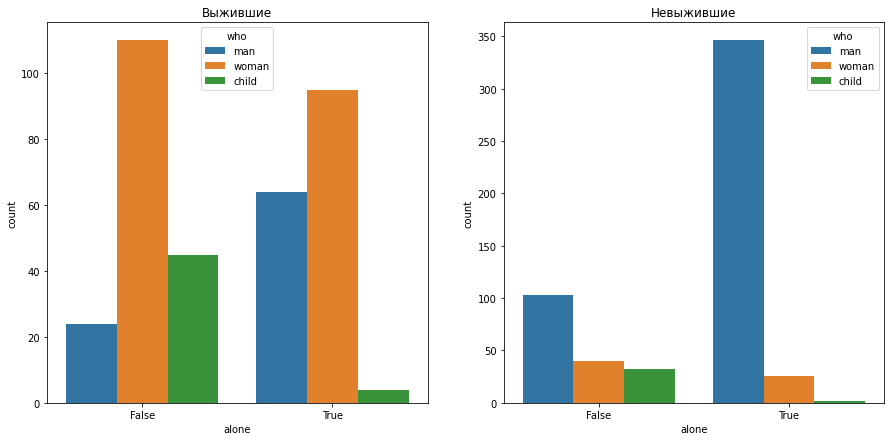

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(x='alone', data=titanic[titanic.alive=="yes"], hue='who', ax=axes[0], hue_order=['man', 'woman', 'child'])
axes[0].set_title("Выжившие")
sns.countplot(x='alone', data=titanic[titanic.alive=="no"], hue='who', ax=axes[1], hue_order=['man', 'woman', 'child'])
axes[1].set_title("Невыжившие")

Видно, что первых в шлюпки запускали женщин и детей, поэтому их больше выжило, несмотря на то, что они могли путешествовать одни.

Также среди выживших присутствуют мужчины, которые путешествовали одни - их класс нужно будет установить. Эти мужчины заняли около 70 мест, которые могли бы достаться женщинам или детям

In [70]:
t1 = titanic[titanic.alive=="yes"]
t1[t1.who=='man']['pclass'].value_counts(normalize=True)

1    0.477273
3    0.431818
2    0.090909
Name: pclass, dtype: float64

Из выживших мужчин почти половина это представители первого класса, они посредством влияния и денег могли позволить себе уплыть в безопасности. При этом также большую часть составляют представители третьего класса, они были более молодые, ловкие и смогли найти себе шлюпку или как-то иначе спастись с кораблекрушения.

#### Посмотрим, каким образом возраст, пол, класс влияют на выживаемость

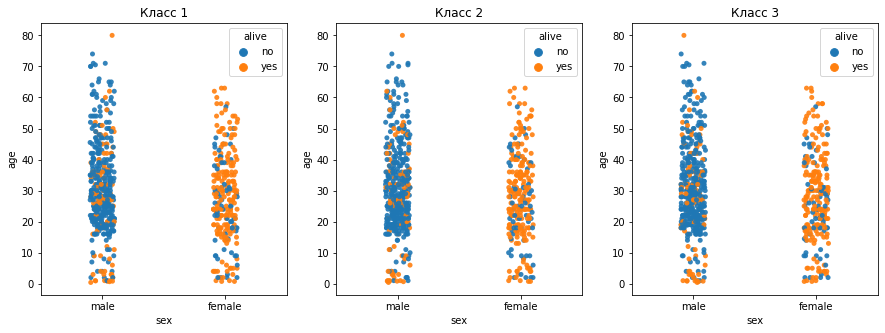

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for class_number in range(1, 4):
    sns.stripplot(x='sex', y='age', data=titanic, hue='alive', ax=axes[class_number-1], order=['male', 'female'], alpha=0.9)
    axes[class_number-1].set_title(f"Класс {class_number}")

Очевидно, что спаслись преимущественно женщины и дети до 13 лет, потому что их и сажали в шлюпку первыми.

Касательно возраста, можно заметить, что мужчины от 20 до 60 лет могли выжить, в то время как люди более старшие погибали.

#### Корреляции

In [98]:
corr_table = titanic[['age', 'sibsp', 'parch', 'fare']].corr()

<AxesSubplot:>

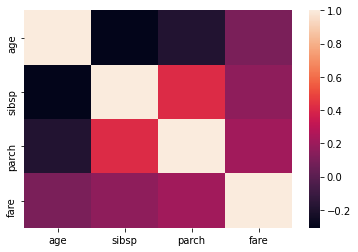

In [99]:
sns.heatmap(corr_table)

Как и ожидалось, корреляция между количественными переменными отсутствует

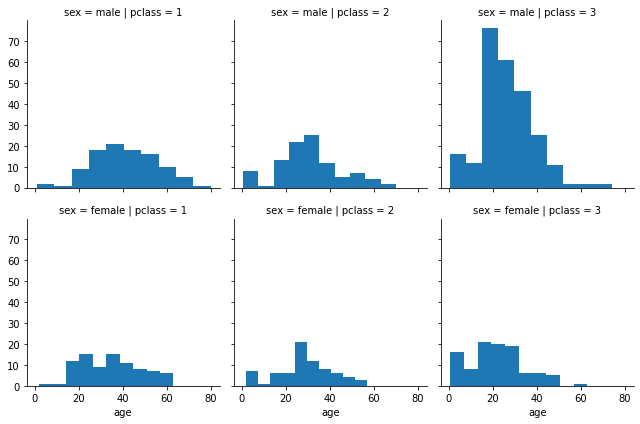

In [105]:
fig=sns.FacetGrid(titanic, col="pclass", row="sex")
fig=fig.map(plt.hist, "age")